In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import heapq
from pathlib import Path

sns.set_palette("pastel", 9)
#husl

### Visualization functions

In [2]:
def general_info(df):
    print("################### Shape #################### \n", df.shape, "\n")
    print("################### Info ####################")
    df.info()
    print("\n", "################### Unique values #################### \n", df.nunique(), "\n")
    print("################### Nulls #################### \n", df.isnull().sum(axis=0), "\n")
    print("################### Description #################### \n")
    return df.describe().T


def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    sns.countplot(df, x=df[column], hue = df[compare_column], palette='Greens', gap=0.05, 
                  stat=stat, order=order)
    plt.title(f'{compare_column} distribution in every {column} class')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()


def count_grouped_plot(df, column, groupby):
    plt.figure(figsize=(12,6))
    mean_values = df.groupby(groupby)[column].mean().reset_index()
    sns.barplot(x=groupby, y=column, data=mean_values, color="#03C04A")
    
    plt.title(f'Mean {column} for every {groupby} class')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()

def count_99_grouped(df, value, column, compare_column):
    df = df[[column, compare_column]]
    df_reduced = df[df[column] == value]
    df_reduced = df_reduced.groupby(compare_column).count()
    sns.countplot(df_reduced, x=df_reduced[compare_column])
    
    

#03C04A - parakeet
#03AC13" - shamrock
#028A0F - emerald


In [3]:
file_path = Path('adults_data','adults_cleaned_train_data.csv')

df = pd.read_csv(file_path)
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
0,18-24,Federal-gov,344394,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,40,United-States,<=50K
1,61-70,Self-emp-inc,165667,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,<=50K
2,25-30,Private,276624,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,<=50K
3,31-40,Private,219546,13,Married-civ-spouse,Exec-managerial,Other-relative,White,Male,3411,47,United-States,<=50K
4,31-40,Private,103474,9,Married-civ-spouse,Sales,Wife,White,Female,0,30,United-States,<=50K


In [4]:
general_info(df)

################### Shape #################### 
 (36822, 13) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36822 entries, 0 to 36821
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36822 non-null  object
 1   workclass       36822 non-null  object
 2   fnlwgt          36822 non-null  int64 
 3   education-num   36822 non-null  int64 
 4   marital-status  36822 non-null  object
 5   occupation      36813 non-null  object
 6   relationship    36822 non-null  object
 7   race            36822 non-null  object
 8   sex             36822 non-null  object
 9   capital         36822 non-null  int64 
 10  hours-per-week  36822 non-null  int64 
 11  region          36052 non-null  object
 12  income          36822 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.7+ MB

 ################### Unique values #################### 
 age          

,count,mean,std,min,25%,50%,75%,max
fnlwgt,36822.0,189506.673701,105333.746620,13492.0,117476.0,178316.0,237352.25,1484705.0
education-num,36822.0,10.135544,2.556648,1.0,9.0,10.0,13.00,16.0
capital,36822.0,1041.472136,7673.805087,-4356.0,0.0,0.0,0.00,99999.0
hours-per-week,36822.0,40.948808,12.028255,1.0,40.0,40.0,45.00,99.0


In [5]:
dups = df[df.duplicated(subset=['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'], keep=False)]

grouped_dups = dups.groupby(['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'])["income"].nunique()

grouped_dups[grouped_dups >1]

age    workclass         education-num  marital-status      occupation         relationship  race   sex     capital  hours-per-week  region       
18-24  Private           9              Married-civ-spouse  Craft-repair       Husband       White  Male    0        45              United-States    2
                                                            Machine-op-inspct  Wife          White  Female  0        40              United-States    2
                                                            Transport-moving   Husband       White  Male    0        50              United-States    2
                         10             Married-civ-spouse  Transport-moving   Husband       White  Male    0        60              United-States    2
                                        Never-married       Other-service      Own-child     White  Male    0        32              United-States    2
                                                                                             

In [6]:
dups

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
1,61-70,Self-emp-inc,165667,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,<=50K
2,25-30,Private,276624,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,<=50K
5,41-50,Private,105449,13,Married-civ-spouse,Sales,Husband,White,Male,0,65,United-States,>50K
6,51-60,Private,52900,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,40,United-States,<=50K
7,18-24,Private,382199,13,Married-civ-spouse,Sales,Husband,White,Male,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36808,31-40,Private,272960,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,42,United-States,>50K
36814,0-17,Private,198146,7,Never-married,Sales,Own-child,White,Female,0,16,United-States,<=50K
36815,61-70,Private,185455,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,40,United-States,>50K
36819,18-24,Private,149396,9,Never-married,Adm-clerical,Own-child,Black,Female,0,40,United-States,<=50K


## Boxploty

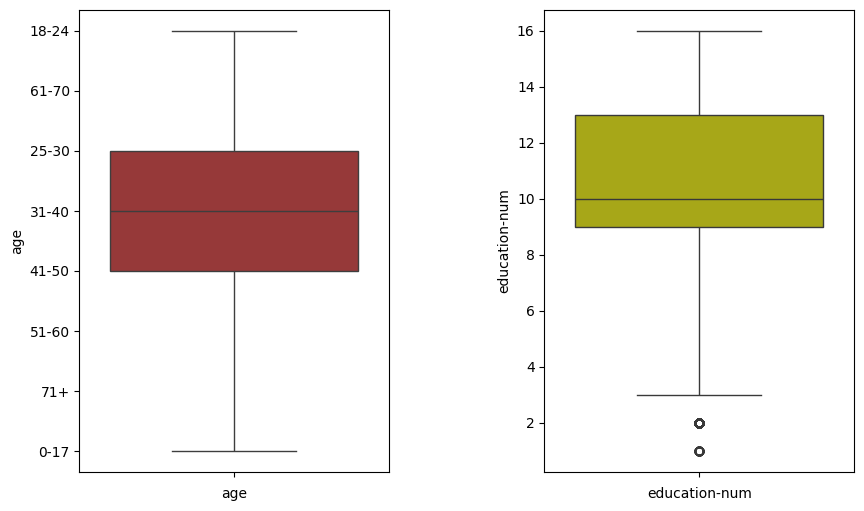

In [79]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5)
 
# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('age')
 
 
# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['education-num'], ax=ax[1], color='y')
ax[1].set_xlabel('education-num')
 
# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    

## NaN visualization

In [80]:
# Amount of missing values
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), "Valid values": df.notnull().sum()})
df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0 ]
df_missing_values = df_missing_values.T



fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missing values', 'Valid values']
    ax = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x1000 with 0 Axes>

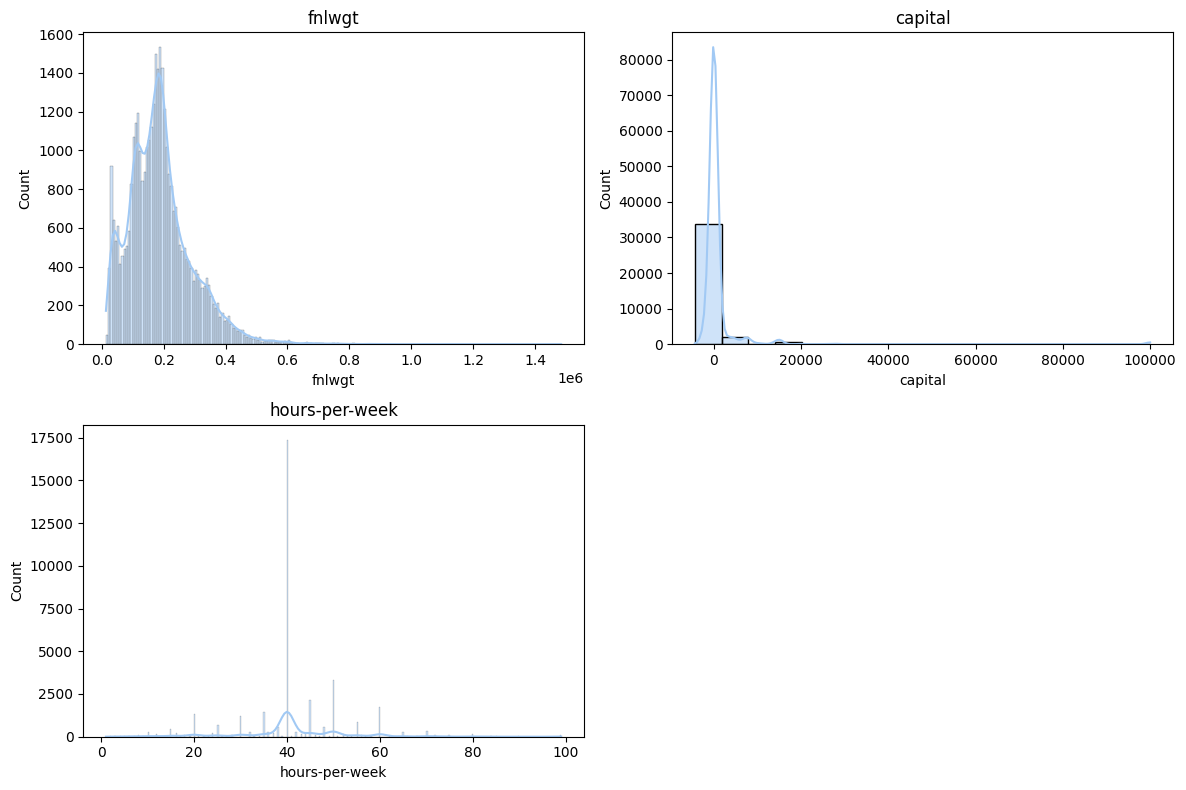

In [35]:
numerical_features = ['fnlwgt', 'capital', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

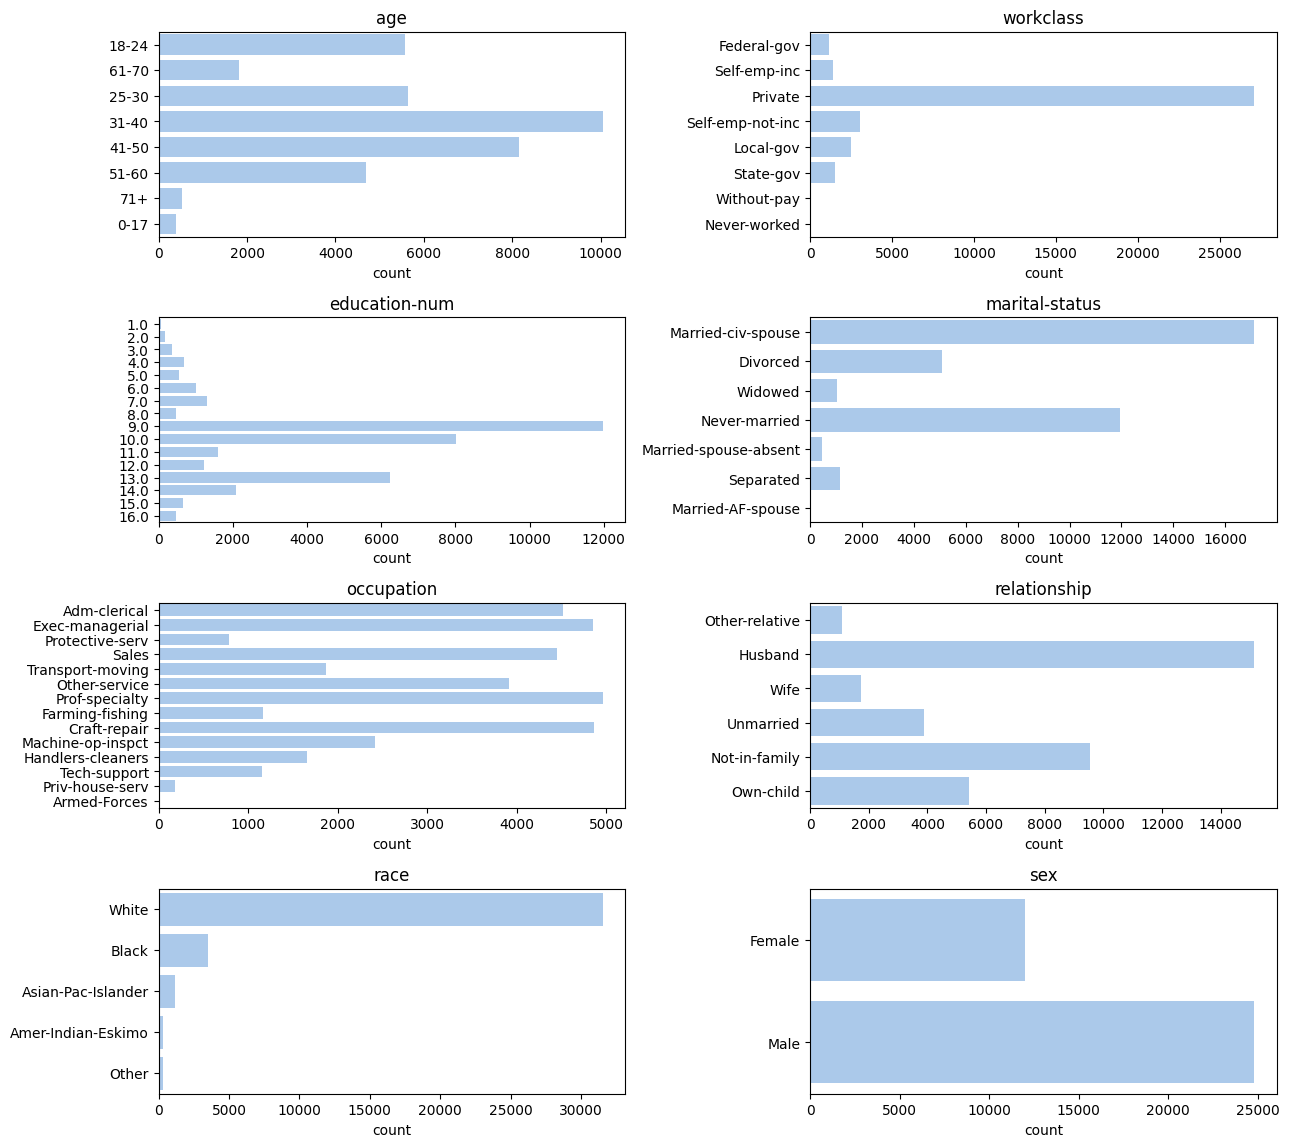

In [36]:
categorical_features = ['age','workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'region']
plt.figure(figsize=(13, 14))
#plots without country
for i, feature in enumerate(categorical_features, 1):
    if i < len(categorical_features):
        plt.subplot(5, 2, i)
        sns.countplot(data=df, y=feature)       # can do stat="percent"
        plt.title(feature)
        plt.ylabel(None)
plt.tight_layout()
plt.show()

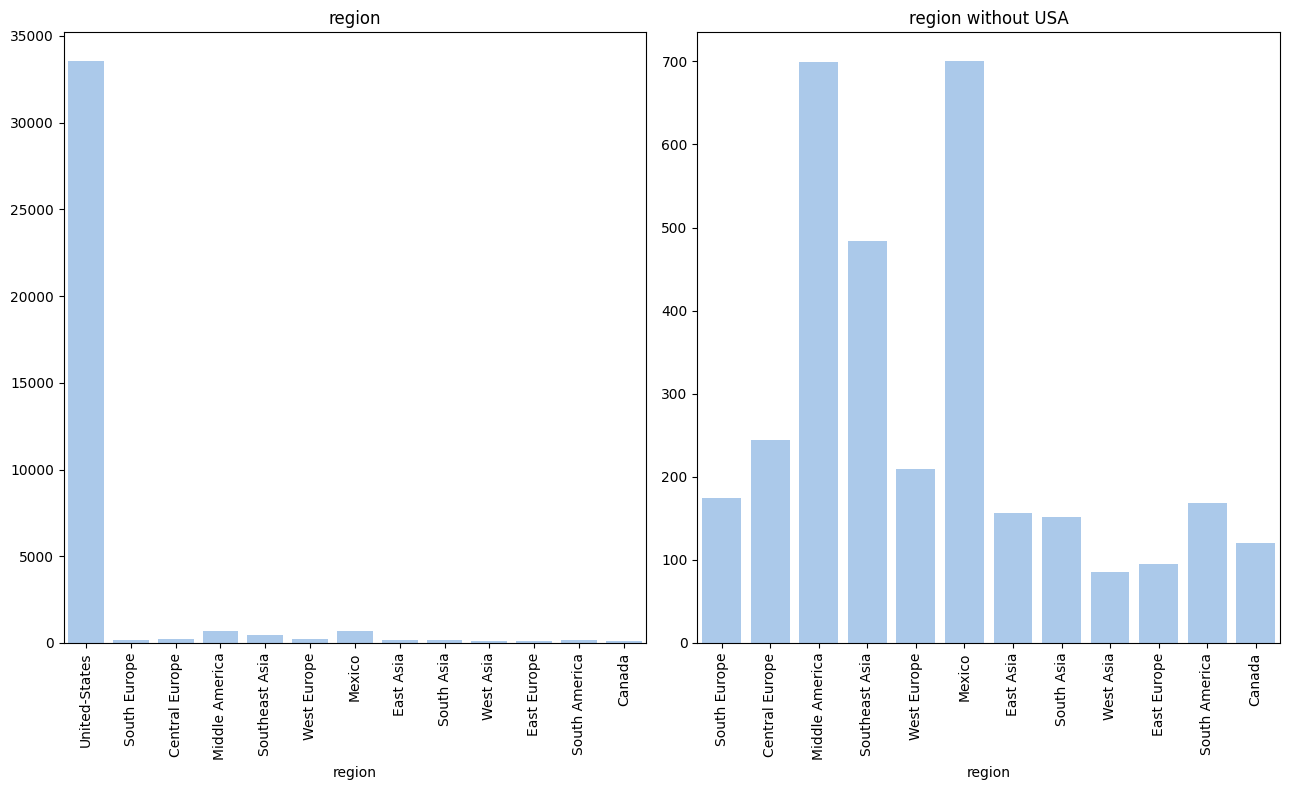

In [37]:
fix, axes = plt.subplots(1, 2, figsize=(13, 8))
for i, usa in enumerate([True, False]):
    if usa:
        plt.subplot(1,2,1)
        sns.countplot(data = df, 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1])
        plt.ylabel(None)
        plt.xticks(rotation=90)
    else:
        plt.subplot(1,2,2)
        sns.countplot(data = df[df['region'] != 'United-States'], 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1] + ' without USA')
        plt.ylabel(None)
        plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

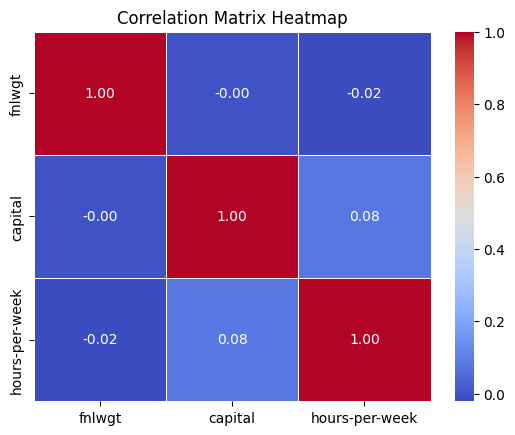

In [38]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

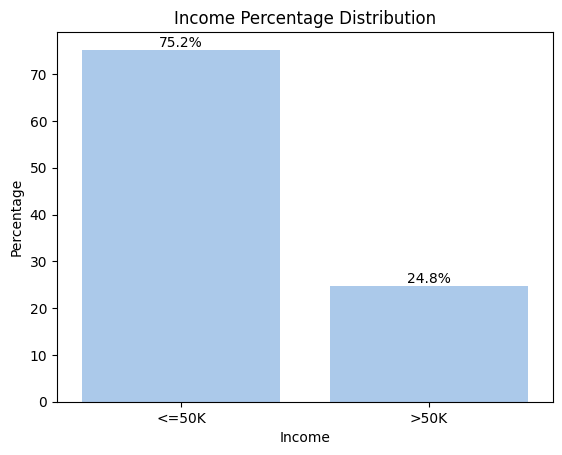

In [39]:
ax = sns.countplot(data=df, x="income", stat="percent")
plt.ylabel("Percentage")
plt.xlabel("Income")
plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

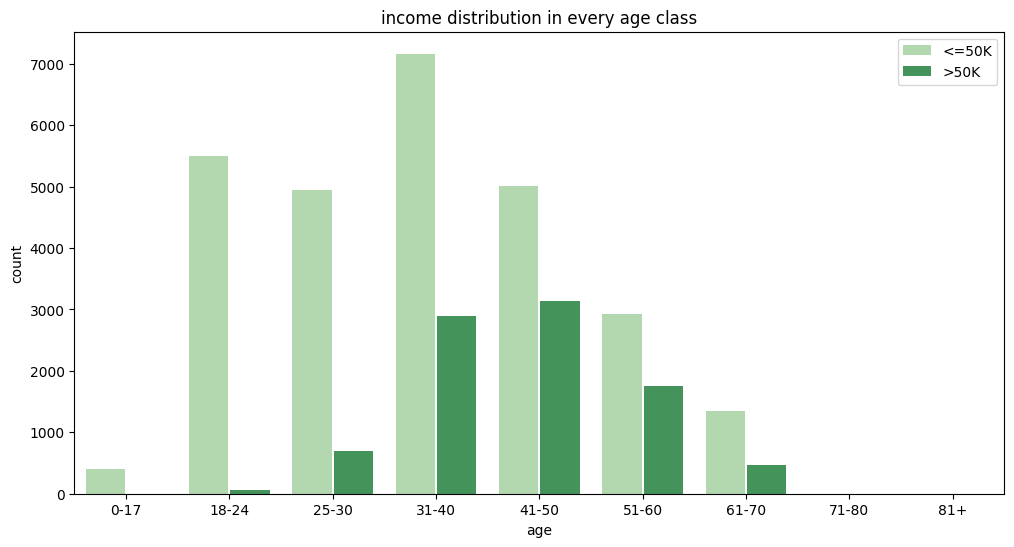

In [40]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71-80','81+']
count_compare_plot(df, column="age", compare_column="income", order=labels_age)

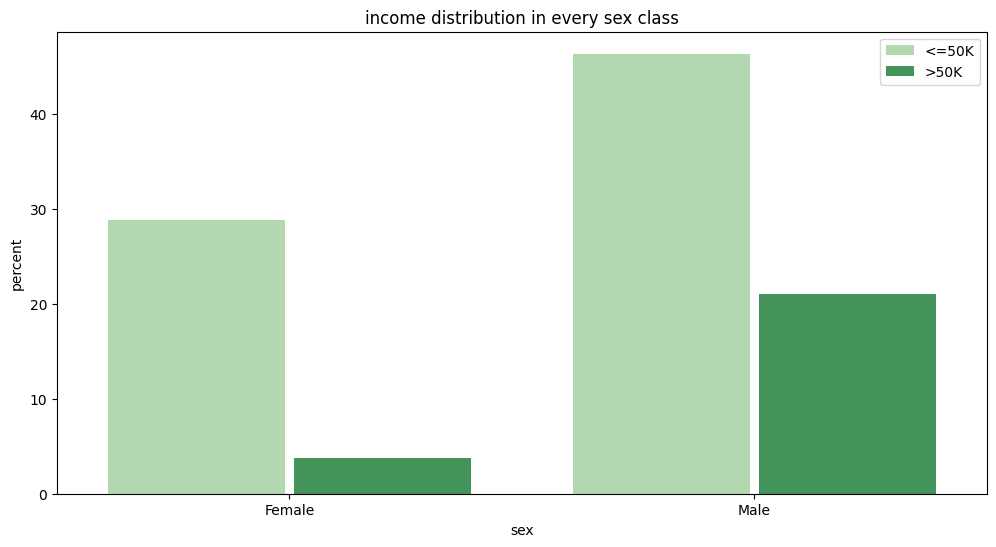

In [41]:
count_compare_plot(df, column="sex", compare_column="income", stat="percent")

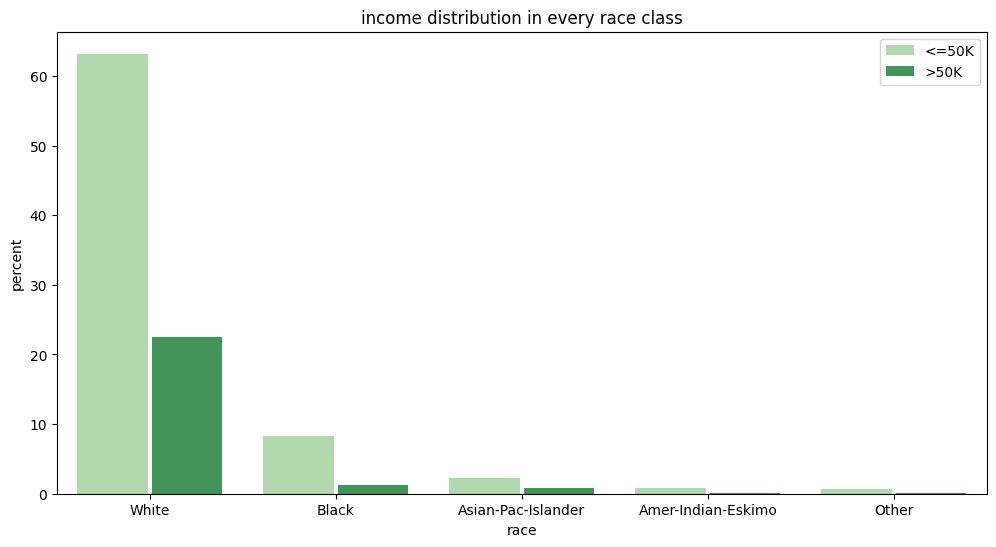

In [42]:
count_compare_plot(df, column="race", compare_column="income", stat="percent")

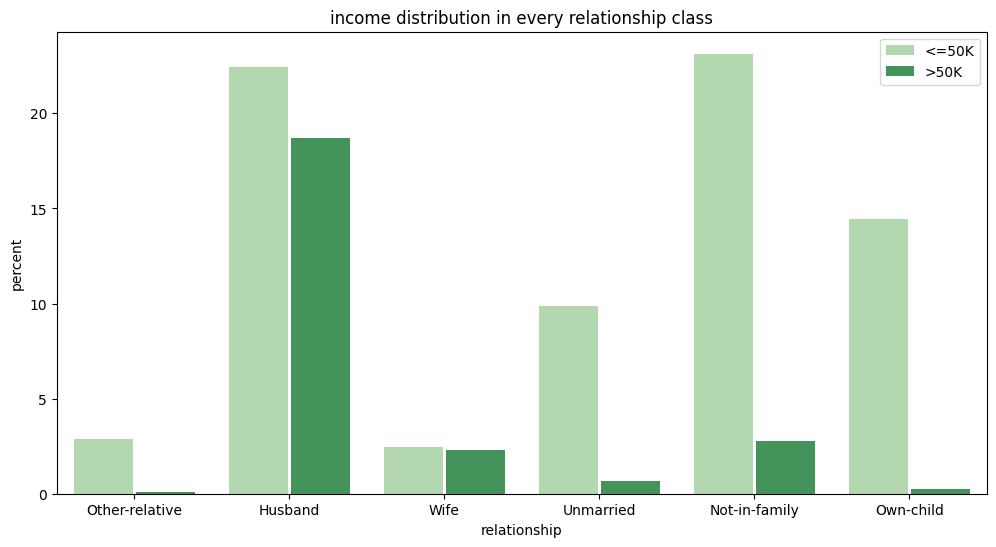

In [43]:
count_compare_plot(df, column="relationship", compare_column="income", stat="percent")

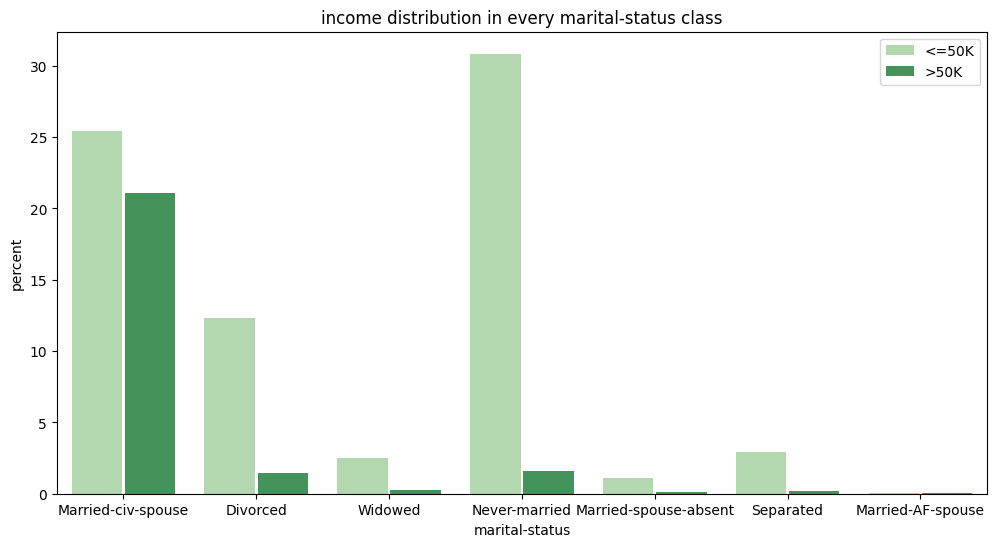

In [44]:
count_compare_plot(df, column="marital-status", compare_column="income", stat="percent")

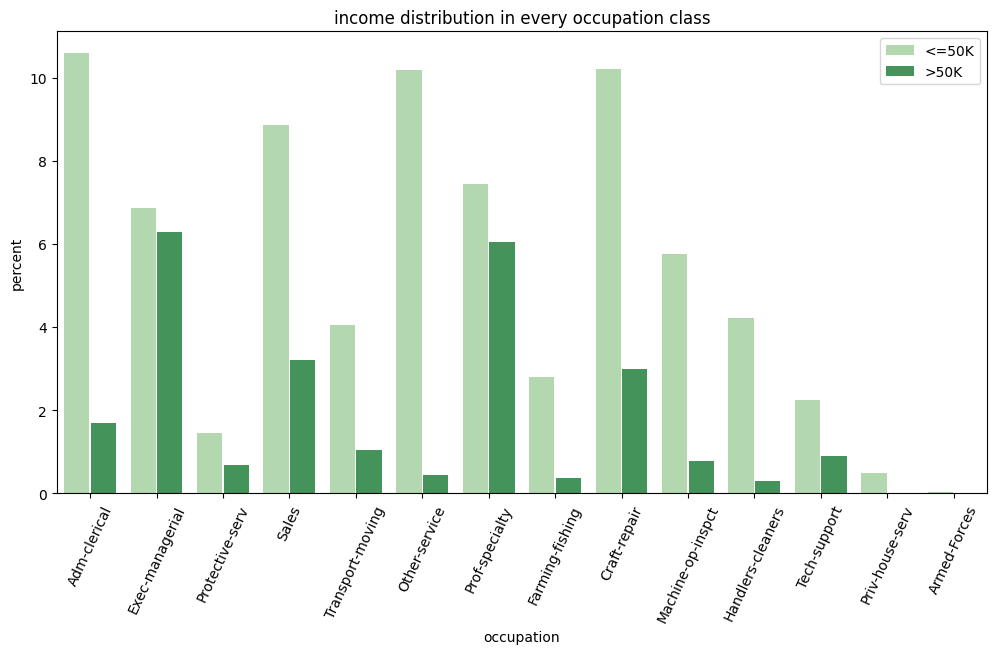

In [45]:
count_compare_plot(df, column="occupation", compare_column="income", stat="percent", rotation=65)

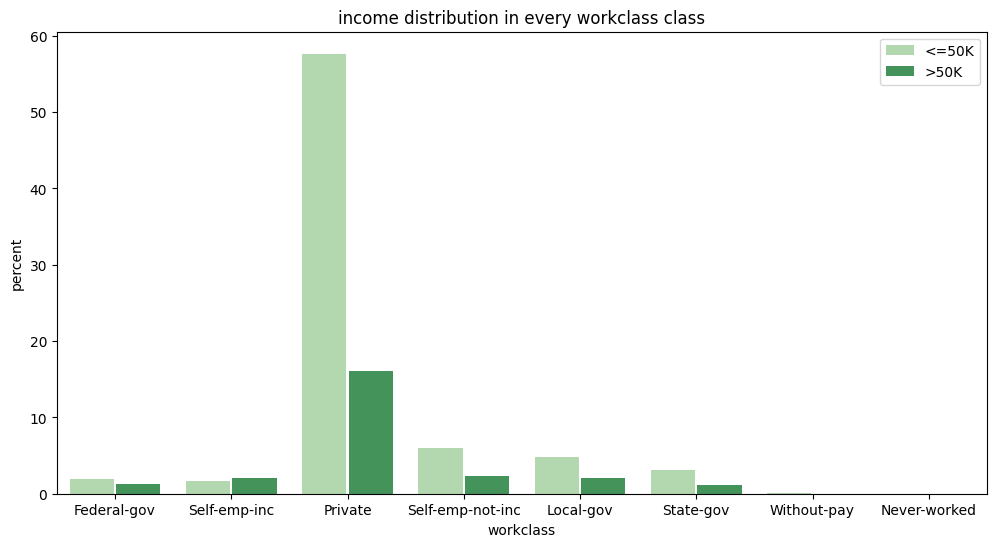

In [46]:
count_compare_plot(df, column="workclass", compare_column="income", stat="percent")

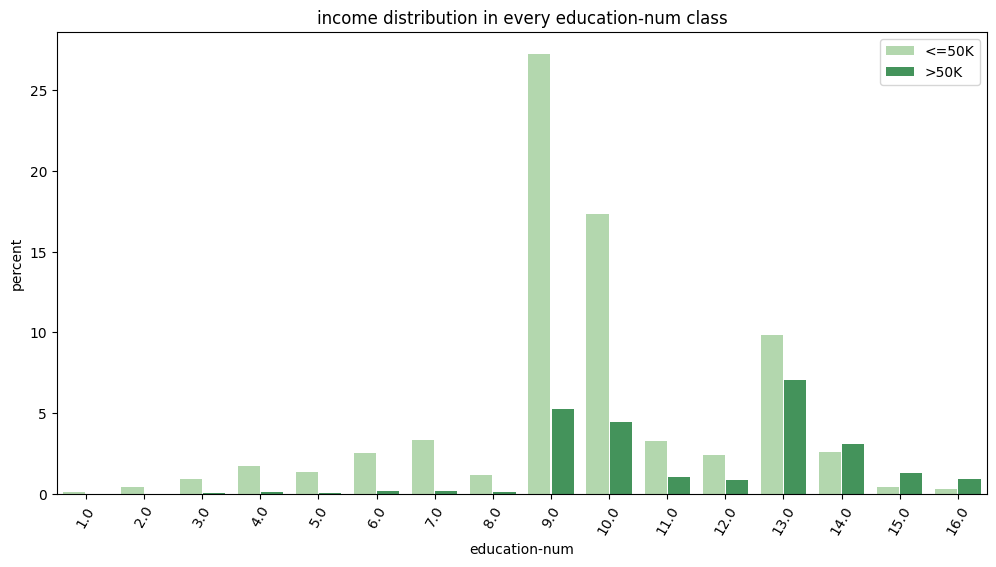

In [47]:
count_compare_plot(df, column="education-num", compare_column="income", stat="percent", rotation=60)

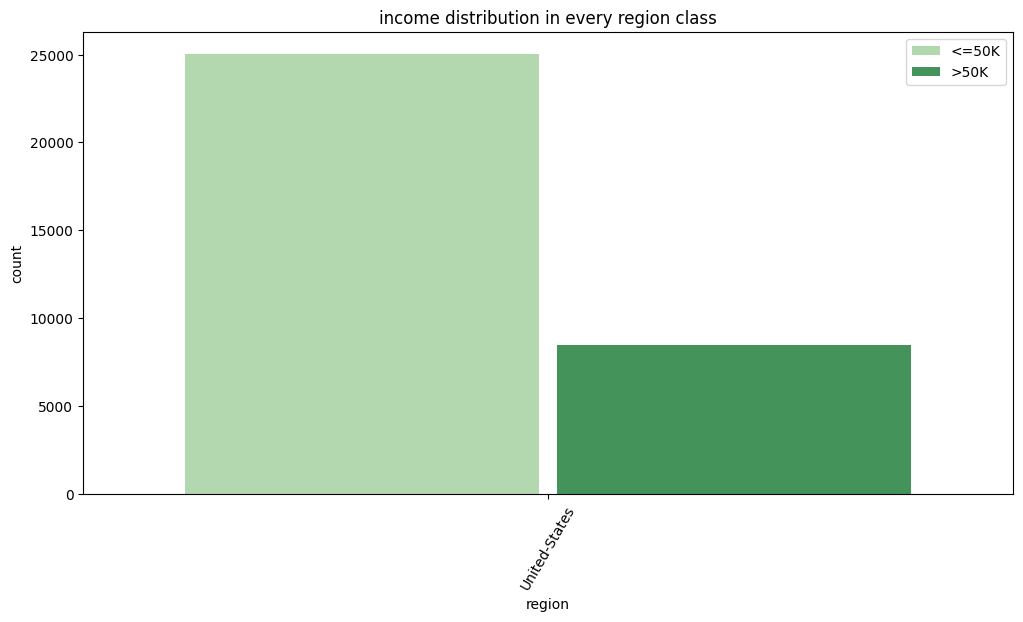

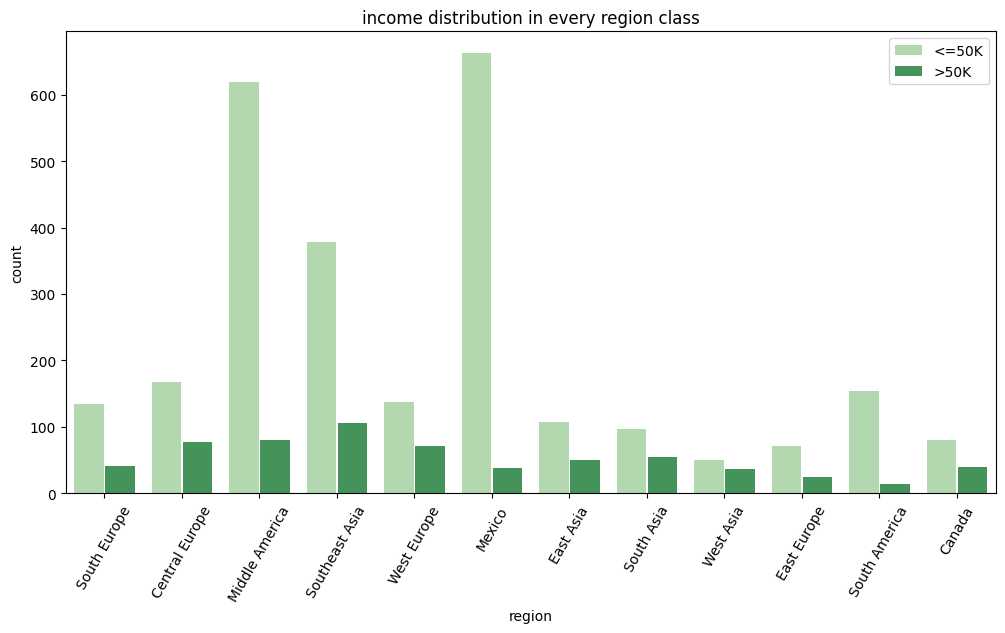

In [57]:
count_compare_plot(df[df["region"] =='United-States'], column="region", compare_column="income", stat="count", rotation=60)
count_compare_plot(df[df["region"] !='United-States'], column="region", compare_column="income", stat="count", rotation=60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


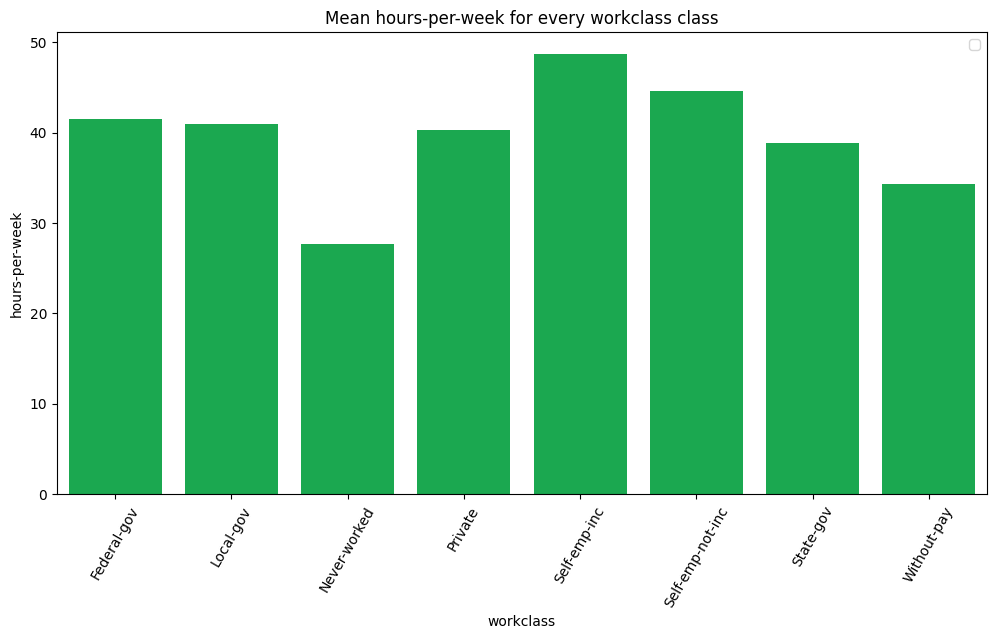

In [69]:
count_grouped_plot(df, "hours-per-week", "workclass")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


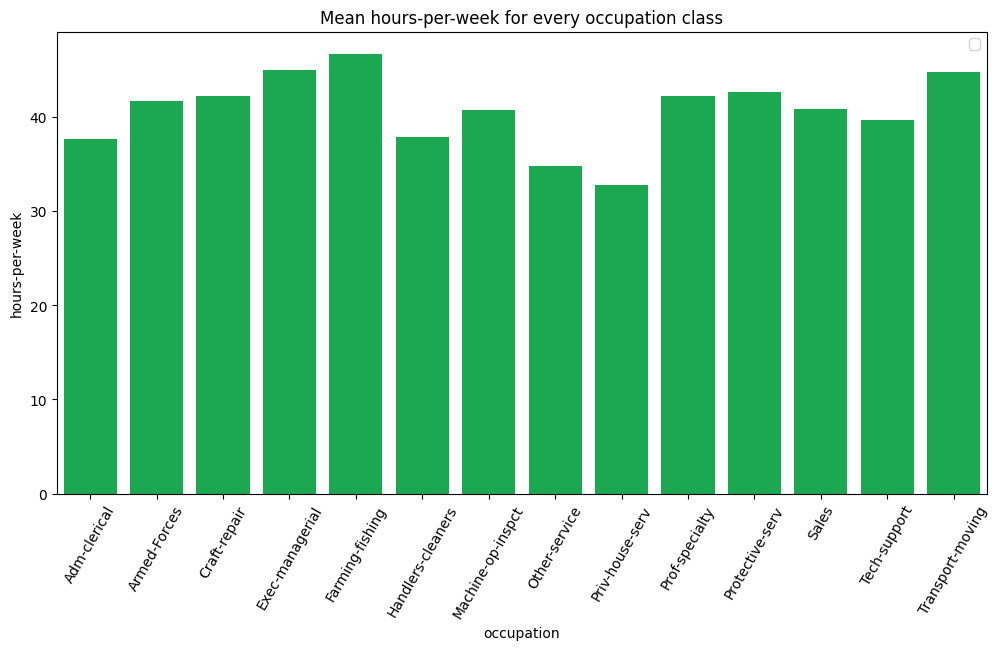

In [70]:
count_grouped_plot(df, "hours-per-week", "occupation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


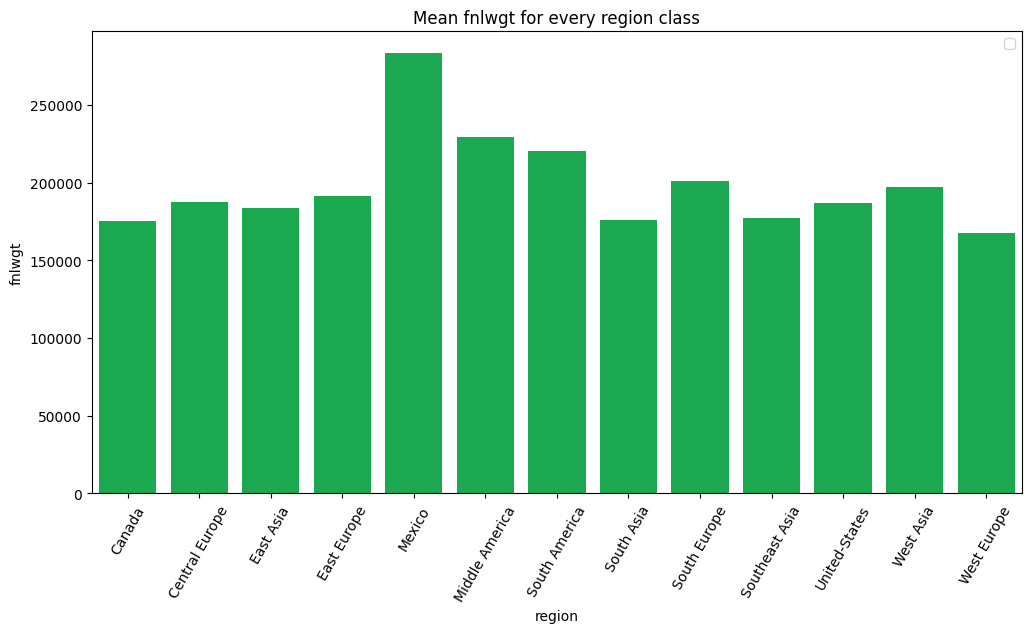

In [71]:
count_grouped_plot(df, "fnlwgt", "region")

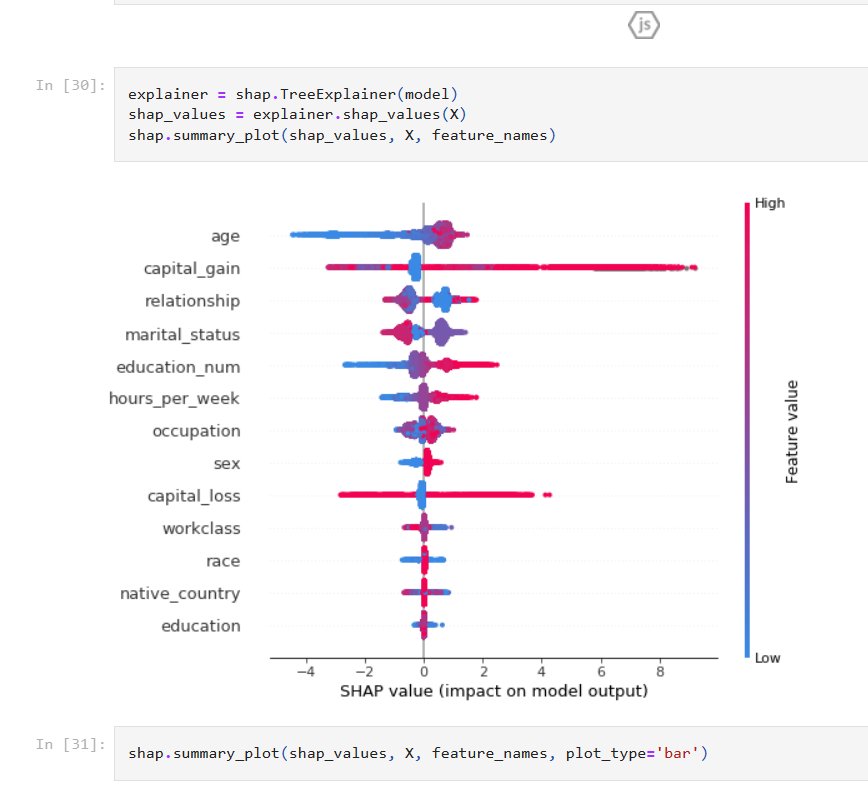